In [2]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [3]:
#O dataset foi carregado da pasta local para o colab através da opção upload.
#criando o DataFrame.
df = pd.read_csv("/content/Data_Science_Fields_Salary_Categorization.csv")

In [4]:
#Visualizando as 5 primeiras linhas
df.head()

,Unnamed: 0,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,1,2020,Data Scientist,MI,FT,"6,352,272.00",DE,DE,L,0
1,2,2020,Machine Learning Scientist,SE,FT,"20,688,070.00",JP,JP,S,0
2,3,2020,Big Data Engineer,SE,FT,"8,674,985.00",GB,GB,M,50
3,4,2020,Product Data Analyst,MI,FT,"1,591,390.00",HN,HN,S,0
4,5,2020,Machine Learning Engineer,SE,FT,"11,935,425.00",US,US,L,50


In [5]:
df.sample(5)

,Unnamed: 0,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
326,327,2022,Data Analyst,EX,FT,"10,344,035.00",US,US,M,100
193,194,2021,Data Science Manager,SE,FT,"13,845,093.00",US,US,L,100
291,292,2022,Data Analyst,SE,FT,"9,596,082.00",US,US,M,100
586,587,2022,Data Analyst,MI,FT,"3,644,840.00",GB,GB,M,0
391,392,2022,AI Scientist,MI,FT,"9,548,340.00",US,US,M,0


In [6]:
#Quantidade de linhas  e colunas
df.shape

(607, 10)

In [7]:
#Verificando os tipos de dados
df.dtypes

Unnamed: 0               int64
Working_Year             int64
Designation             object
Experience              object
Employment_Status       object
Salary_In_Rupees        object
Employee_Location       object
Company_Location        object
Company_Size            object
Remote_Working_Ratio     int64
dtype: object

In [8]:
#Alterando o tipo de dado da coluna Working_Year de int64 para data
df["Working_Year"] = pd.to_datetime(df["Working_Year"])

In [9]:
#Verificando novamente os tipos de dados
df.dtypes

Unnamed: 0                       int64
Working_Year            datetime64[ns]
Designation                     object
Experience                      object
Employment_Status               object
Salary_In_Rupees                object
Employee_Location               object
Company_Location                object
Company_Size                    object
Remote_Working_Ratio             int64
dtype: object

In [10]:
#Verificando se temos dados faltantes
df.isnull().sum()

Unnamed: 0              0
Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Salary_In_Rupees        0
Employee_Location       0
Company_Location        0
Company_Size            0
Remote_Working_Ratio    0
dtype: int64

In [11]:
#renomeando o nome das colunas para o português
df=df.rename(columns={"Unnamed: 0":"id", "Working_Year":"Ano_trabalho", "Designation":"função_exercida",
                   "Experience":"nivel_de_experiencia", "Employment_Status":"tipo_de_emprego",
                   "Salary_In_Rupees":"salario_bruto_pago", "Employee_Location": "país_funcionario",
                   "Company_Location":"pais_contratante", "Company_Size":"numeros_funcionarios", 
                   "Remote_Working_Ratio": "quantidade_trabalho_remotamente"})

In [12]:
df.dtypes

id                                          int64
Ano_trabalho                       datetime64[ns]
função_exercida                            object
nivel_de_experiencia                       object
tipo_de_emprego                            object
salario_bruto_pago                         object
país_funcionario                           object
pais_contratante                           object
numeros_funcionarios                       object
quantidade_trabalho_remotamente             int64
dtype: object

In [13]:
df["id"] = df["id"].astype("object")

In [14]:
df['quantidade_trabalho_remotamente'] = df['quantidade_trabalho_remotamente'].apply(str)

In [15]:
#df['quantidade_trabalho_remotamente'] = df['quantidade_trabalho_remotamente'].astype("object")

In [16]:

df['salario_bruto_pago']= df['salario_bruto_pago'].str.replace(',','')

In [17]:
df['salario_bruto_pago'].head(10)

0     6352272.00
1    20688070.00
2     8674985.00
3     1591390.00
4    11935425.00
5     5729004.00
6    15118205.00
7     2843416.00
8    10741883.00
9     9946188.00
Name: salario_bruto_pago, dtype: object

In [18]:
df['salario_bruto_pago'] = df['salario_bruto_pago'].astype(float)


In [19]:
#retorna somente o nome das colunas
df.columns

Index(['id', 'Ano_trabalho', 'função_exercida', 'nivel_de_experiencia',
       'tipo_de_emprego', 'salario_bruto_pago', 'país_funcionario',
       'pais_contratante', 'numeros_funcionarios',
       'quantidade_trabalho_remotamente'],
      dtype='object')

In [20]:
df.describe()

,salario_bruto_pago
count,6.070000e+02
mean,8.935485e+06
std,5.646034e+06
min,2.274890e+05
25%,4.991076e+06
50%,8.081874e+06
75%,1.193542e+07
max,4.774170e+07


In [21]:
#retornando valores unicos das coluna função_exerciada
df["função_exercida"].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [22]:
#retornando valores unicos das coluna nivel_de_experiência
df["nivel_de_experiencia"].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [23]:
#trocando as siglas por nomes na coluna_de_experiência
df['nivel_de_experiencia']= df['nivel_de_experiencia'].str.replace('MI','Nível Médio / Intermediário')
df['nivel_de_experiencia']= df['nivel_de_experiencia'].str.replace('SE','Nível Sênior / Especialista')
df['nivel_de_experiencia']= df['nivel_de_experiencia'].str.replace('EN','Nível Iniciante / Júnior')
df['nivel_de_experiencia']= df['nivel_de_experiencia'].str.replace('EX','Nível Executivo / Diretor')


In [24]:
df["nivel_de_experiencia"].unique()

array(['Nível Médio / Intermediário', 'Nível Sênior / Especialista',
       'Nível Iniciante / Júnior', 'Nível Executivo / Diretor'],
      dtype=object)

In [25]:
#retornando valores unicos das coluna tipo_de_emprego
df["tipo_de_emprego"].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [26]:
#trocando as siglas por nomes na coluna tipo_de_emprego
df['tipo_de_emprego']= df['tipo_de_emprego'].str.replace('FT','Tempo integral')
df['tipo_de_emprego']= df['tipo_de_emprego'].str.replace('CT','Contrato')
df['tipo_de_emprego']= df['tipo_de_emprego'].str.replace('PT','Meio período')
df['tipo_de_emprego']= df['tipo_de_emprego'].str.replace('FL','Freelance')

In [27]:
df["tipo_de_emprego"].unique()

array(['Tempo integral', 'Contrato', 'Meio período', 'Freelance'],
      dtype=object)

In [28]:
#retornando valores unicos das coluna país_funcionario
df["país_funcionario"].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL',
       'PT', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'PH', 'ES',
       'DK', 'RU', 'IT', 'HR', 'BG', 'SG', 'BR', 'IQ', 'VN', 'BE', 'UA',
       'MT', 'CL', 'RO', 'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS',
       'PR', 'LU', 'JE', 'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO',
       'IE', 'CH'], dtype=object)

In [29]:
#retornando valores unicos das coluna pais_contratante
df["pais_contratante"].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

In [30]:
#retornando valores unicos das coluna numeros_funcionarios
df["numeros_funcionarios"].unique()

array(['L', 'S', 'M'], dtype=object)

In [31]:
#trocando as siglas por nomes na coluna numeros_funcionarios
df['numeros_funcionarios']= df['numeros_funcionarios'].str.replace('M','entre 50 a 250')
df['numeros_funcionarios']= df['numeros_funcionarios'].str.replace('L','Mais de 250')
df['numeros_funcionarios']= df['numeros_funcionarios'].str.replace('S','Menos de 50')


In [32]:
df["numeros_funcionarios"].unique()

array(['Mais de 250', 'Menos de 50', 'entre 50 a 250'], dtype=object)

In [33]:
df["numeros_funcionarios"].head()

0       Mais de 250
1       Menos de 50
2    entre 50 a 250
3       Menos de 50
4       Mais de 250
Name: numeros_funcionarios, dtype: object

In [34]:
#retornando valores unicos das coluna quantidade_trabalho_remotamente
df["quantidade_trabalho_remotamente"].unique()

array(['0', '50', '100'], dtype=object)

In [35]:
#trocando as siglas por nomes na coluna quantidade_trabalho_remotamente
df['quantidade_trabalho_remotamente']= df['quantidade_trabalho_remotamente'].str.replace('50','Parcialmente Remoto')
df['quantidade_trabalho_remotamente']= df['quantidade_trabalho_remotamente'].str.replace('100','Totalmente Remoto')
df['quantidade_trabalho_remotamente']= df['quantidade_trabalho_remotamente'].str.replace('0','Sem Trabalho Remoto')

In [36]:
df['quantidade_trabalho_remotamente'].head()

0    Sem Trabalho Remoto
1    Sem Trabalho Remoto
2    Parcialmente Remoto
3    Sem Trabalho Remoto
4    Parcialmente Remoto
Name: quantidade_trabalho_remotamente, dtype: object

In [37]:
df.groupby("numeros_funcionarios")["quantidade_trabalho_remotamente"].value_counts(ascending=False)

numeros_funcionarios  quantidade_trabalho_remotamente
Mais de 250           Totalmente Remoto                  106
                      Parcialmente Remoto                 60
                      Sem Trabalho Remoto                 32
Menos de 50           Totalmente Remoto                   49
                      Parcialmente Remoto                 18
                      Sem Trabalho Remoto                 16
entre 50 a 250        Totalmente Remoto                  226
                      Sem Trabalho Remoto                 79
                      Parcialmente Remoto                 21
Name: quantidade_trabalho_remotamente, dtype: int64

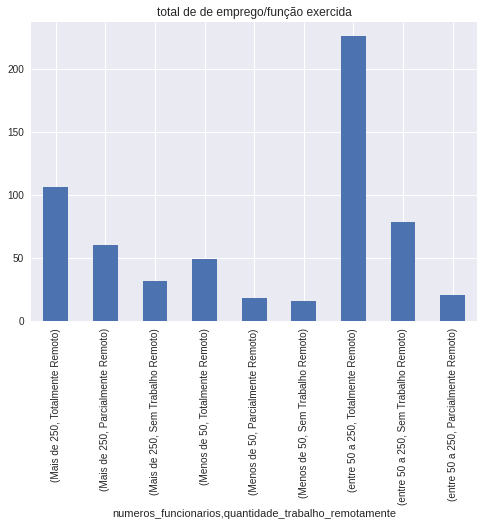

In [38]:
df.groupby("numeros_funcionarios")["quantidade_trabalho_remotamente"].value_counts(ascending=False).plot.bar(title="total de de emprego/função exercida")

In [39]:
df['pais_contratante'].value_counts(ascending=False)

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: pais_contratante, dtype: int64

In [40]:
#quantidade do tamanho da empresa que trabalha remotamente

df.loc[df["função_exercida"] == "Machine Learning Scientist"]

,id,Ano_trabalho,função_exercida,nivel_de_experiencia,tipo_de_emprego,salario_bruto_pago,país_funcionario,pais_contratante,numeros_funcionarios,quantidade_trabalho_remotamente
1,2,1970-01-01 00:00:00.000002020,Machine Learning Scientist,Nível Sênior / Especialista,Tempo integral,20688070.0,JP,JP,Menos de 50,Sem Trabalho Remoto
115,116,1970-01-01 00:00:00.000002021,Machine Learning Scientist,Nível Iniciante / Júnior,Tempo integral,17903138.0,US,US,Mais de 250,Totalmente Remoto
126,127,1970-01-01 00:00:00.000002021,Machine Learning Scientist,Nível Sênior / Especialista,Tempo integral,9548340.0,US,US,Menos de 50,Parcialmente Remoto
184,185,1970-01-01 00:00:00.000002021,Machine Learning Scientist,Nível Médio / Intermediário,Freelance,954834.0,PK,PK,entre 50 a 250,Parcialmente Remoto
224,225,1970-01-01 00:00:00.000002021,Machine Learning Scientist,Nível Sênior / Especialista,Tempo integral,17903138.0,US,CA,Mais de 250,Totalmente Remoto
419,420,1970-01-01 00:00:00.000002022,Machine Learning Scientist,Nível Médio / Intermediário,Tempo integral,12731120.0,US,US,Mais de 250,Totalmente Remoto
420,421,1970-01-01 00:00:00.000002022,Machine Learning Scientist,Nível Médio / Intermediário,Tempo integral,8935655.0,US,US,Mais de 250,Totalmente Remoto
495,496,1970-01-01 00:00:00.000002022,Machine Learning Scientist,Nível Médio / Intermediário,Tempo integral,12174134.0,US,US,entre 50 a 250,Parcialmente Remoto


In [41]:
df.loc[df["função_exercida"] == "Machine Learning Scientist"]

,id,Ano_trabalho,função_exercida,nivel_de_experiencia,tipo_de_emprego,salario_bruto_pago,país_funcionario,pais_contratante,numeros_funcionarios,quantidade_trabalho_remotamente
1,2,1970-01-01 00:00:00.000002020,Machine Learning Scientist,Nível Sênior / Especialista,Tempo integral,20688070.0,JP,JP,Menos de 50,Sem Trabalho Remoto
115,116,1970-01-01 00:00:00.000002021,Machine Learning Scientist,Nível Iniciante / Júnior,Tempo integral,17903138.0,US,US,Mais de 250,Totalmente Remoto
126,127,1970-01-01 00:00:00.000002021,Machine Learning Scientist,Nível Sênior / Especialista,Tempo integral,9548340.0,US,US,Menos de 50,Parcialmente Remoto
184,185,1970-01-01 00:00:00.000002021,Machine Learning Scientist,Nível Médio / Intermediário,Freelance,954834.0,PK,PK,entre 50 a 250,Parcialmente Remoto
224,225,1970-01-01 00:00:00.000002021,Machine Learning Scientist,Nível Sênior / Especialista,Tempo integral,17903138.0,US,CA,Mais de 250,Totalmente Remoto
419,420,1970-01-01 00:00:00.000002022,Machine Learning Scientist,Nível Médio / Intermediário,Tempo integral,12731120.0,US,US,Mais de 250,Totalmente Remoto
420,421,1970-01-01 00:00:00.000002022,Machine Learning Scientist,Nível Médio / Intermediário,Tempo integral,8935655.0,US,US,Mais de 250,Totalmente Remoto
495,496,1970-01-01 00:00:00.000002022,Machine Learning Scientist,Nível Médio / Intermediário,Tempo integral,12174134.0,US,US,entre 50 a 250,Parcialmente Remoto


In [42]:
#Quantidade de função exercida para os tipos de emprego(contratação)
df.groupby("tipo_de_emprego")["função_exercida"].value_counts(ascending=False)


tipo_de_emprego  função_exercida                   
Contrato         Applied Machine Learning Scientist    1
                 Business Data Analyst                 1
                 ML Engineer                           1
                 Principal Data Scientist              1
                 Staff Data Scientist                  1
                                                      ..
Tempo integral   Head of Machine Learning              1
                 Lead Machine Learning Engineer        1
                 Machine Learning Manager              1
                 Marketing Data Analyst                1
                 NLP Engineer                          1
Name: função_exercida, Length: 64, dtype: int64

Text(0, 0.5, 'função exercida')

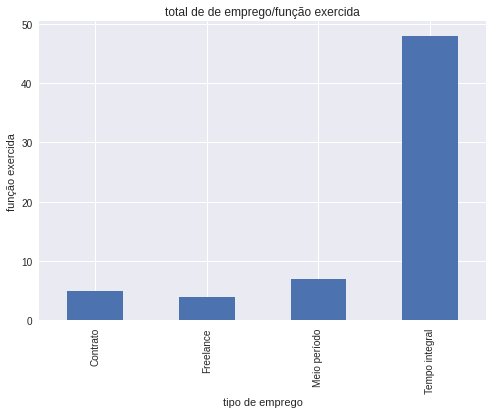

In [43]:
#Visualização quantidade de função exercida para os tipos de emprego(contratação)
import matplotlib.pyplot as plt
df.groupby("tipo_de_emprego")["função_exercida"].nunique().plot.bar(title="total de de emprego/função exercida")
plt.xlabel("tipo de emprego")
plt.ylabel("função exercida")

In [44]:
df.groupby("tipo_de_emprego")["salario_bruto_pago"].mean()

tipo_de_emprego
Contrato          1.468654e+07
Freelance         3.819336e+06
Meio período      2.631403e+06
Tempo integral    9.028598e+06
Name: salario_bruto_pago, dtype: float64

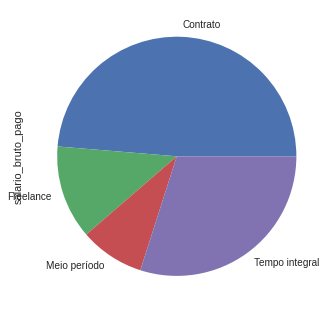

In [45]:
#visualização em grafico de pizza a media salarial por tipo de emprego
df.groupby("tipo_de_emprego")["salario_bruto_pago"].mean().plot.pie();

In [46]:
#Qual país de residência do funcionário que prestaram algum serviço?
df['país_funcionario'].value_counts(ascending=False)

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: país_funcionario, dtype: int64

Text(0.5, 1.0, 'Os 20 primeiros país de residência do funcionário')

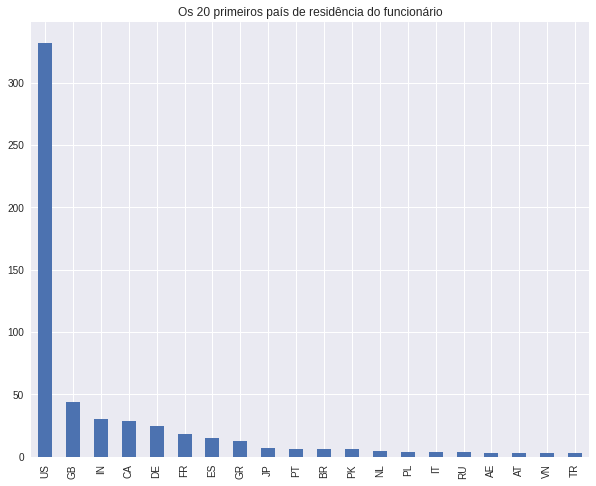

In [50]:
#Os 20 primeiros países de residência dos funcionários que prestaram algum serviço?
top_10 = df['país_funcionario'].value_counts()[:20]
top_10.plot(kind='bar',figsize=(10,8))
plt.title('Os 20 primeiros país de residência do funcionário')

In [51]:
#Qual o país da sede ou sucursal contratante do empregador.
df['pais_contratante'].value_counts(ascending=False)

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: pais_contratante, dtype: int64

Text(0.5, 1.0, '20 país da sede ou sucursal')

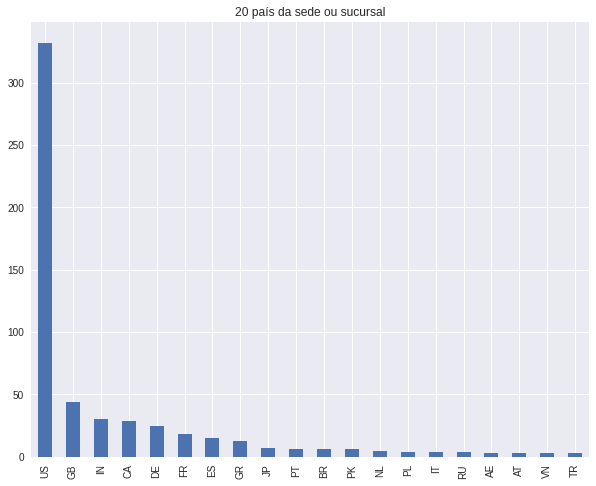

In [52]:
#Gráfico dos primeiros 20 país da sede ou sucursal contratante do empregador.

top_10 = df['país_funcionario'].value_counts()[:20]
top_10.plot(kind='bar',figsize=(10,8))
plt.title('20 país da sede ou sucursal')